In [49]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

neighborhoods = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pit")
neighborhoods.head(3)
#pd.DataFrame(neighborhoods["hood"])

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."


In [47]:
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
arrests.head(3)


,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625


In [32]:

dic = {}

# iterating through the elements of list
for i in neighborhoods["hood"]:
    dic[i] = 0
    
for index, row in arrests.iterrows():
    arrests_neighborhood =  row["INCIDENTNEIGHBORHOOD"]
    if arrests_neighborhood in dic:
        dic[arrests_neighborhood] += 1
        
for n in dic:
    print(n + ": " + str(dic[n]))

Point Breeze North: 261
Squirrel Hill North: 271
Garfield: 662
Bedford Dwellings: 616
Knoxville: 1242
Homewood South: 1944
Middle Hill: 880
Oakwood: 79
North Oakland: 409
Duquesne Heights: 181
Glen Hazel: 154
East Liberty: 1735
Westwood: 209
Morningside: 180
Lincoln Place: 206
Perry North: 567
Northview Heights: 663
Homewood North: 1839
Arlington Heights: 139
Lower Lawrenceville: 249
Larimer: 818
Lincoln-Lemington-Belmar: 1222
Bluff: 1374
Fairywood: 112
Brookline: 1268
Hays: 106
Beltzhoover: 481
Greenfield: 497
East Carnegie: 48
North Shore: 759
Allentown: 886
Bon Air: 249
Allegheny West: 122
Crafton Heights: 549
Manchester: 447
Marshall-Shadeland: 1407
Highland Park: 530
New Homestead: 39
Central Northside: 23
Polish Hill: 153
Overbrook: 294
Friendship: 158
Homewood West: 734
Central Business District: 3790
East Allegheny: 2017
Allegheny Center: 1181
Central Oakland: 490
Brighton Heights: 1026
South Side Slopes: 752
Arlington: 277
Chartiers City: 40
Carrick: 2199
Bloomfield: 932
Banks

In [55]:
df = pd.DataFrame.from_dict(dic, orient="index", columns = ["Arrests"])
display(df)

,Arrests
Point Breeze North,261
Squirrel Hill North,271
Garfield,662
Bedford Dwellings,616
Knoxville,1242
...,...
Regent Square,35
Terrace Village,272
Elliott,622
South Side Flats,3190


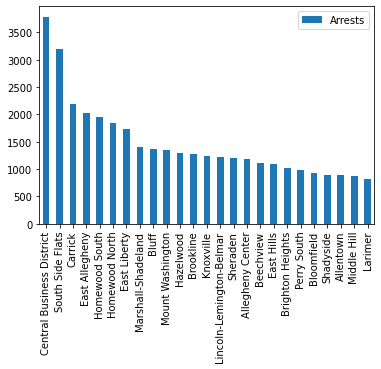

In [53]:
df = df.sort_values("Arrests", ascending=False)
df.iloc[:25].plot(kind = "bar")

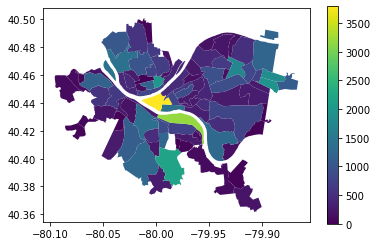

In [48]:
# data = pd.DataFrame(columns = ["Neighborhood", "Arrests"])
# data["Neighborhood"] = neighborhoods["hood"]

# data["Arrests"] = dic.values()


# neighborhoods["Arrests"] = data["Arrests"]
neighborhoods["Arrests"] = dic.values()
neighborhoods.plot(column="Arrests", legend=True)